In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier , plot_tree



In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

Datayı tanıma

In [4]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

DATA CLEANING % VISUALIZATION

In [6]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

([<matplotlib.patches.Wedge at 0x1646b6530d0>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'İyi Huylu'),
  Text(0.428654605109445, -1.013042560566172, 'Kötü Huylu')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

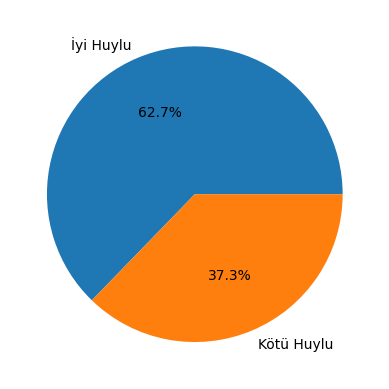

In [7]:
target_count = df.diagnosis.value_counts(normalize=True)
target_count
plt.pie(target_count, labels=['İyi Huylu', 'Kötü Huylu'], autopct='%1.1f%%')

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
df['diagnosis']=df['diagnosis'].map({'M':"Kötü Huylu",'B':"İyi Huylu"})


<Axes: xlabel='diagnosis'>

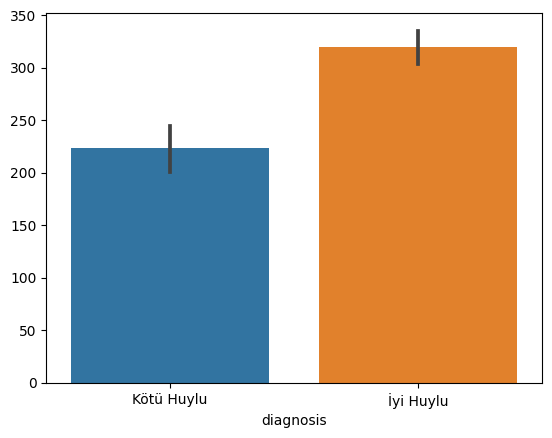

In [10]:
sns.barplot(x='diagnosis',y=df.diagnosis.index,data=df)

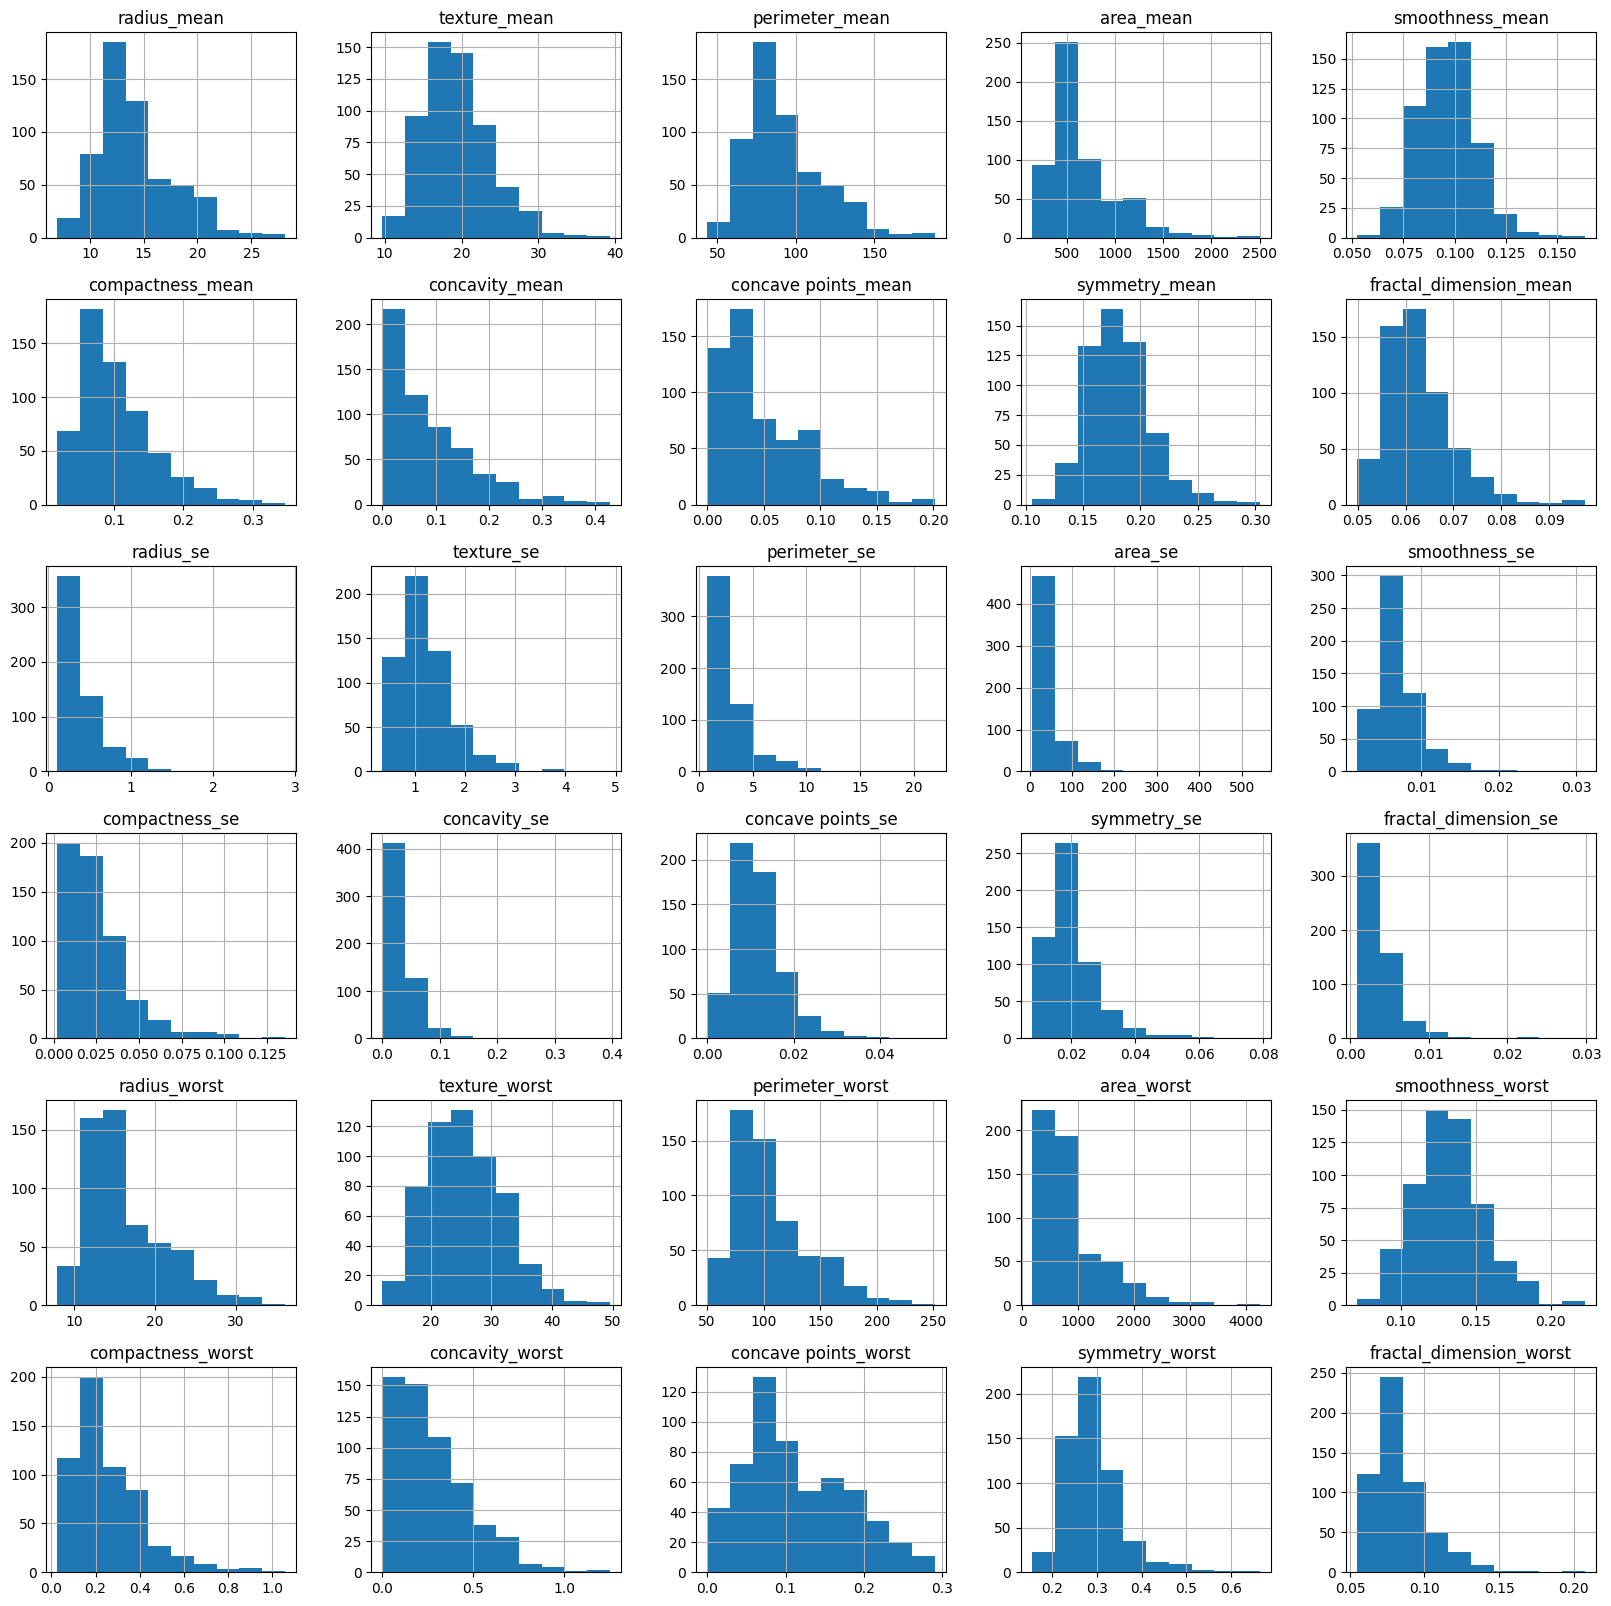

In [11]:
df.hist(figsize=(20,20));

c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

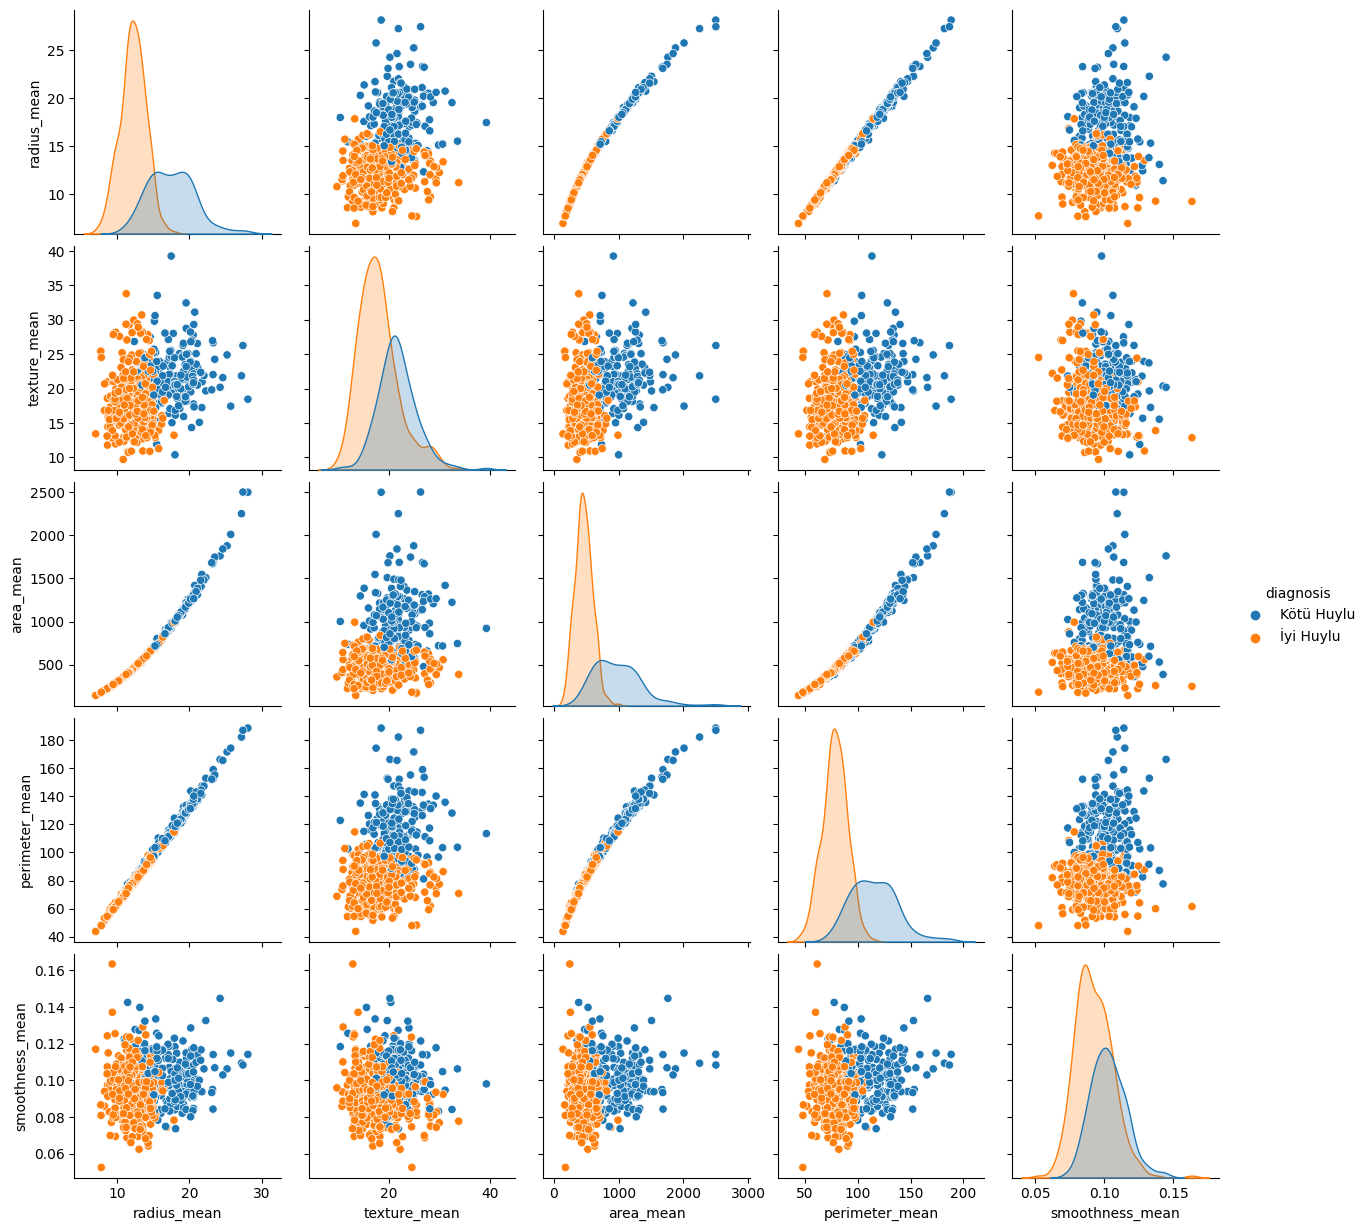

In [37]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean','texture_mean','area_mean','perimeter_mean','smoothness_mean']);

c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

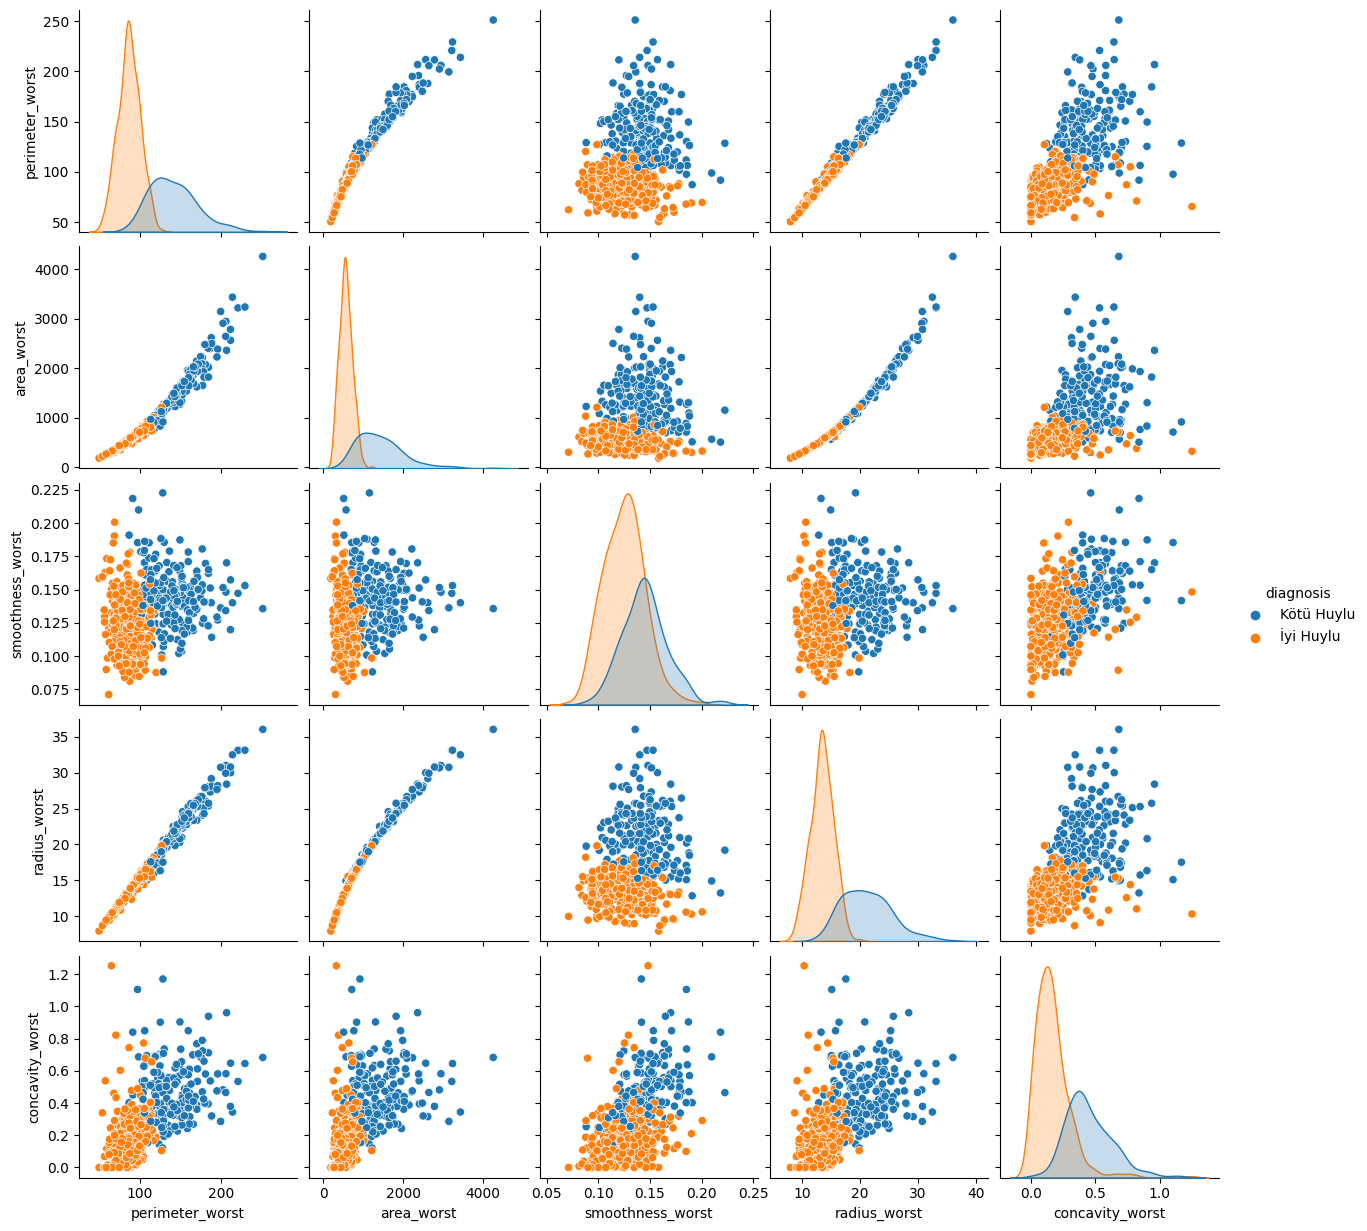

In [38]:
sns.pairplot(df, hue='diagnosis', vars=['perimeter_worst','area_worst','smoothness_worst','radius_worst','concavity_worst']);

c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diagnosis', ylabel='radius_mean'>

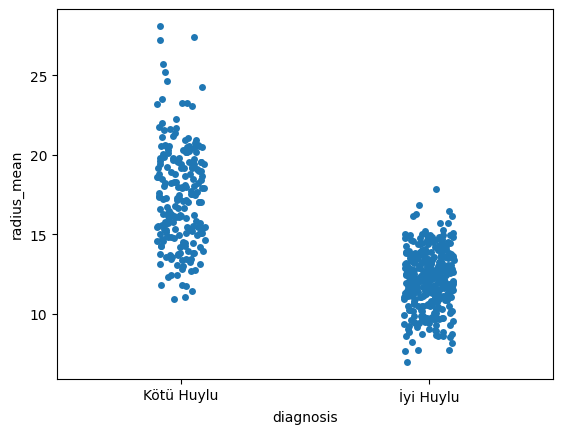

In [13]:
sns.stripplot(x='diagnosis',y='radius_mean',data=df)



c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diagnosis', ylabel='area_mean'>

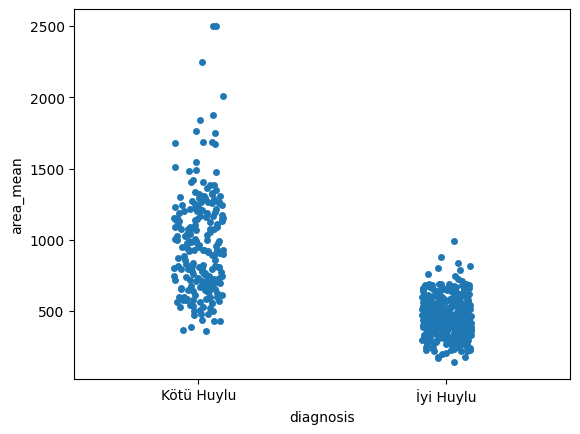

In [14]:
sns.stripplot(x='diagnosis',y='area_mean',data=df)

DATA CLASSIFICATION STANDARTS

In [15]:
model_df=df.copy()

In [16]:
model_df['diagnosis']=model_df['diagnosis'].map({'Kötü Huylu':1,'İyi Huylu':0})

In [17]:
model_df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [18]:
model_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

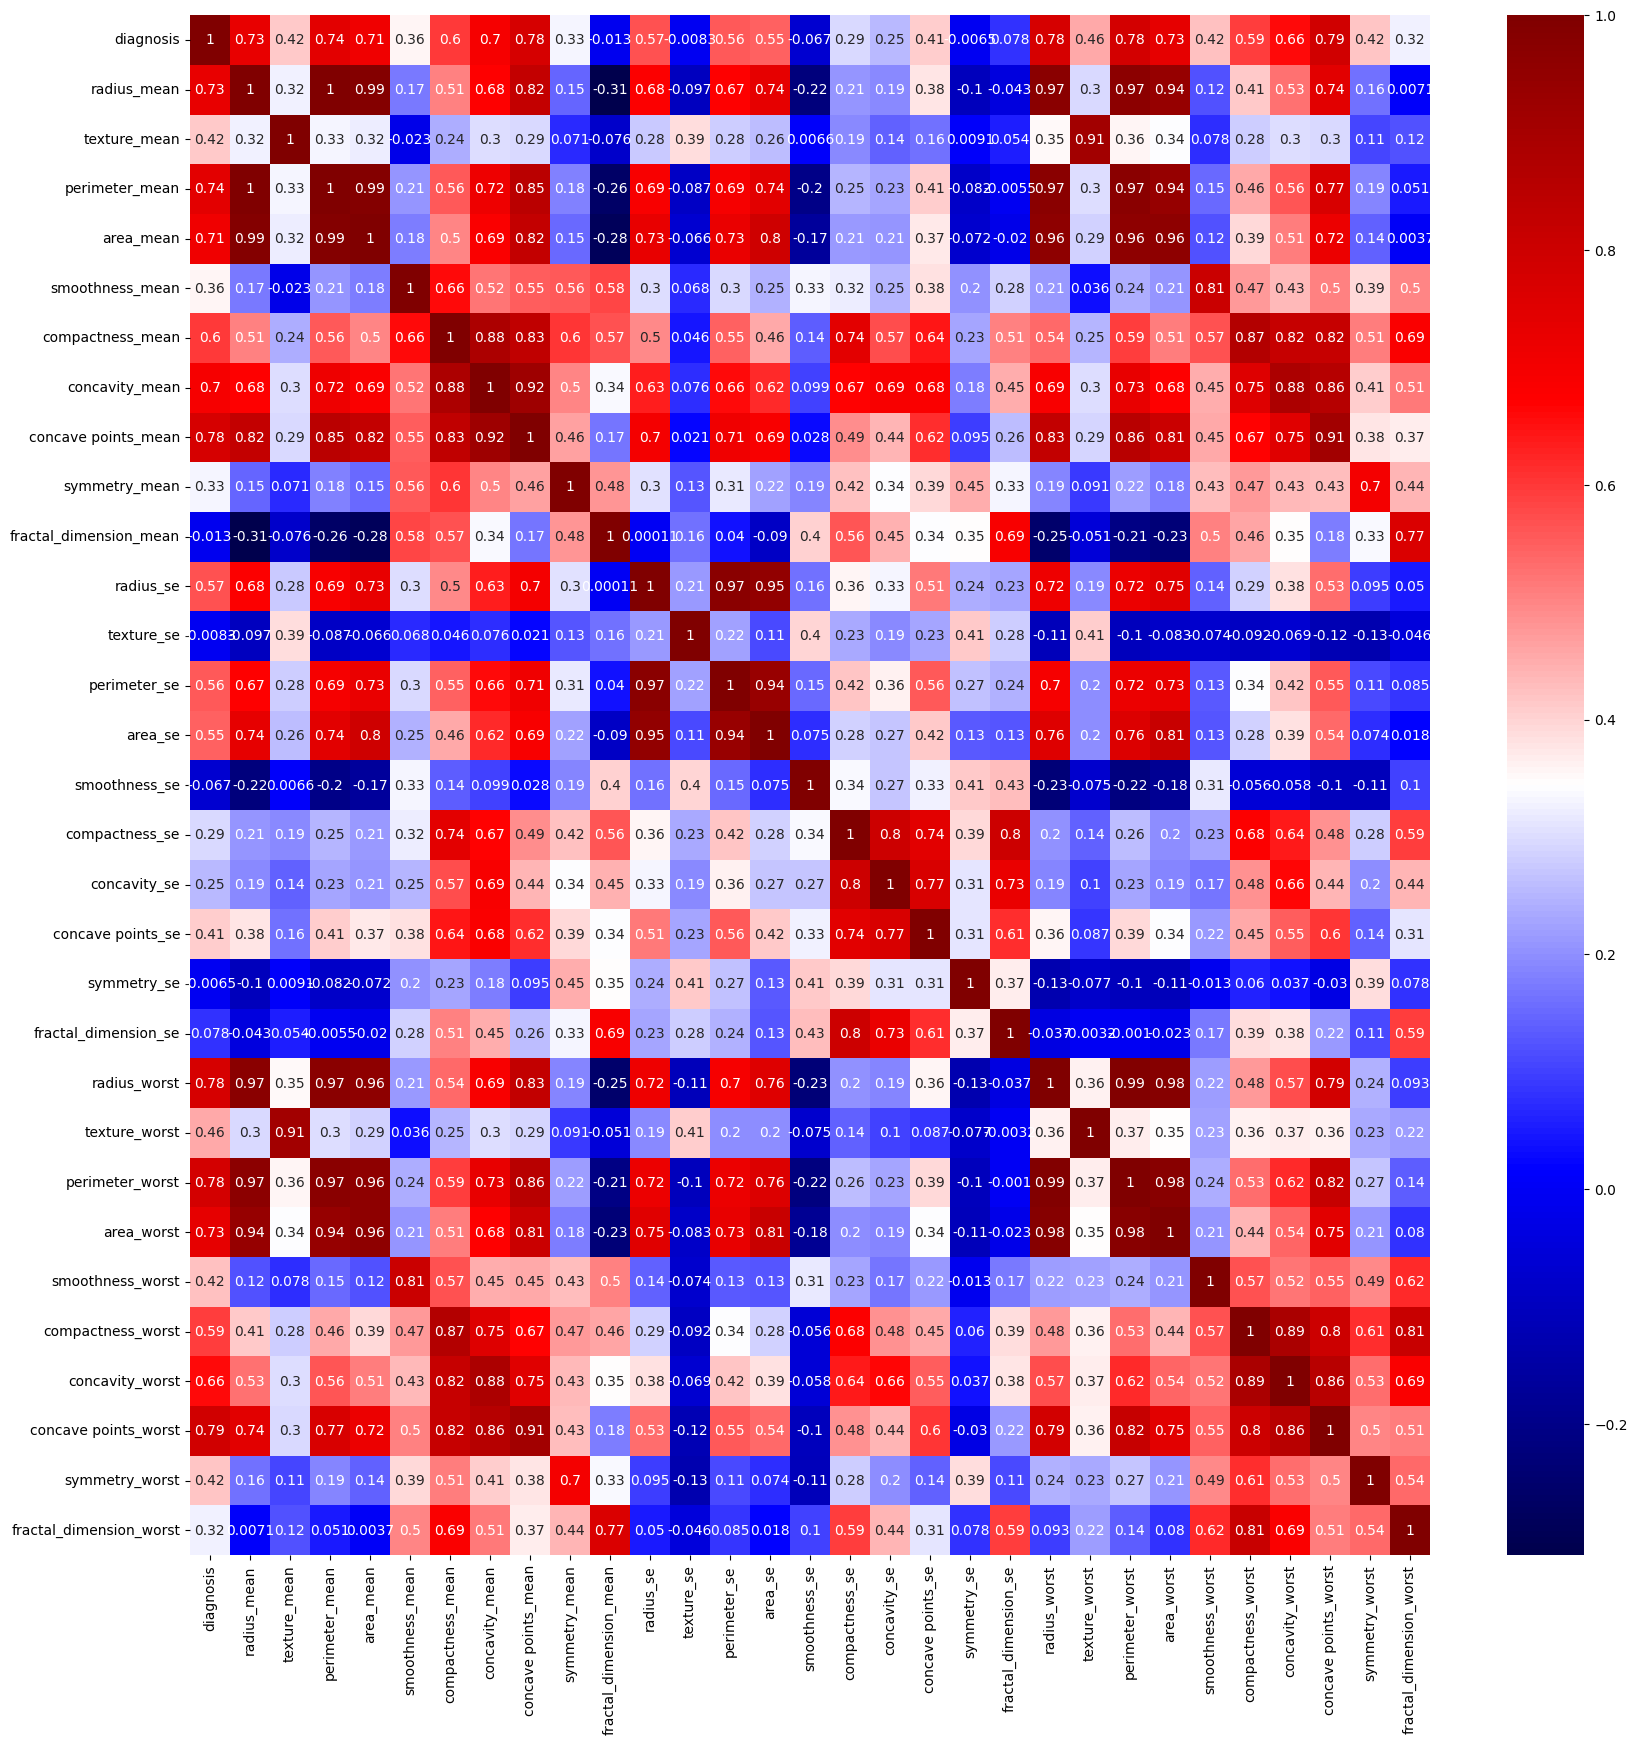

In [19]:
import seaborn as sns
corr_matrix=model_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap = 'seismic')
plt.show()

c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

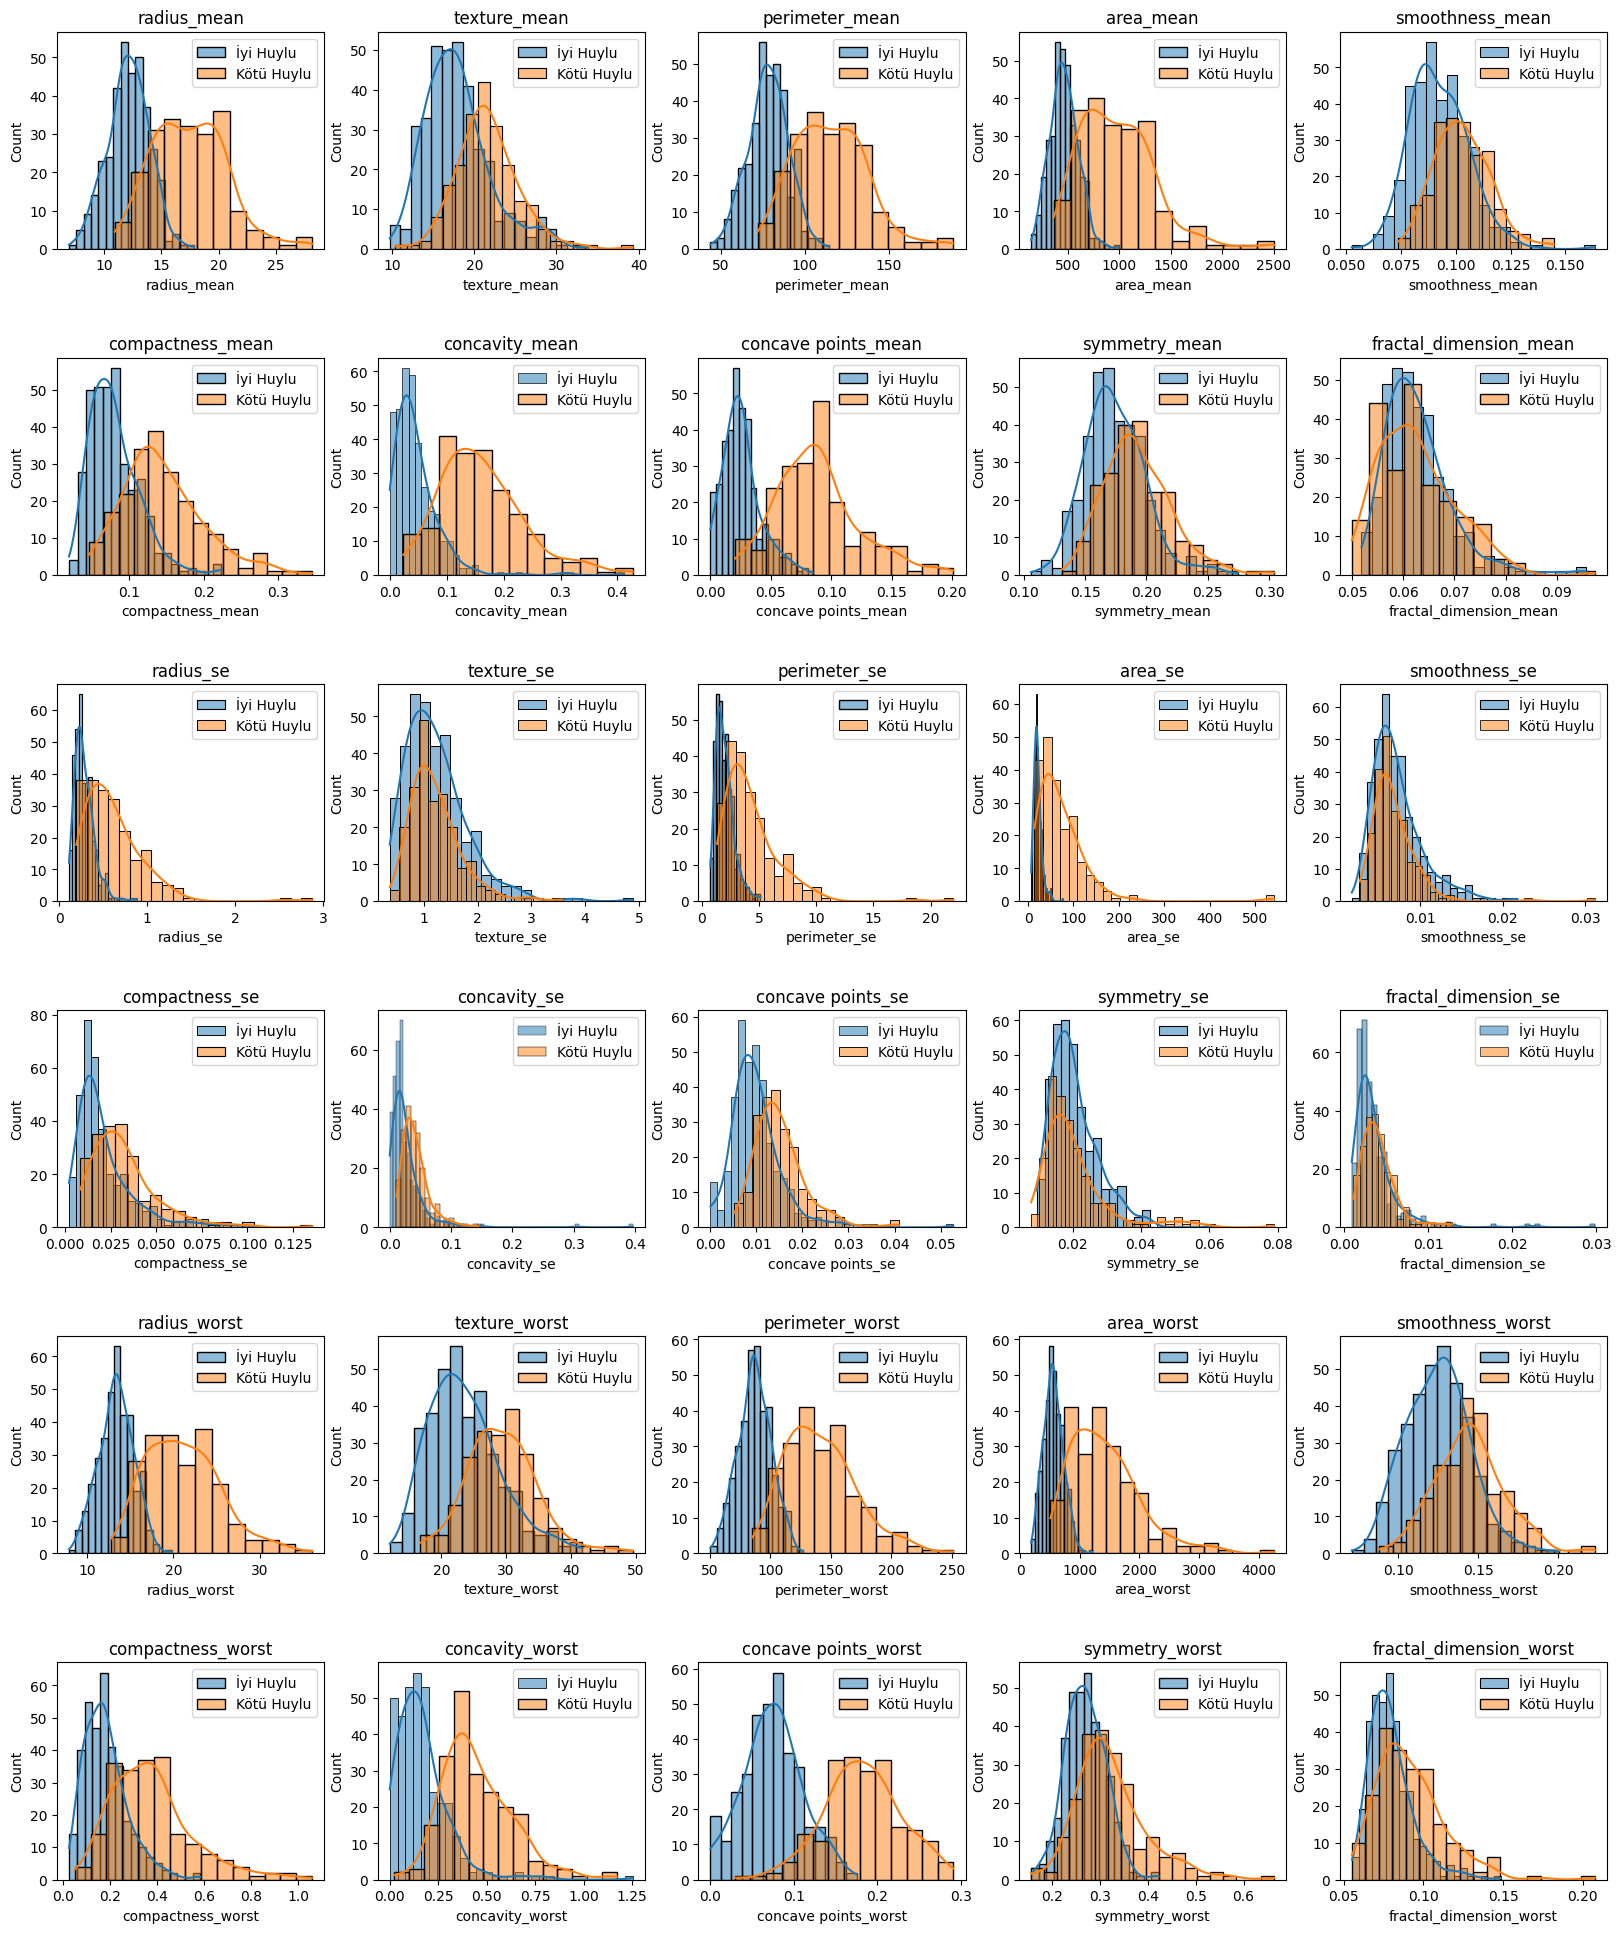

In [20]:
fig, axs = plt.subplots(6, 5, figsize=(20, 24))

features = list(model_df.columns)
features.remove('diagnosis')
for i in range(len(features)):
    row = i // 5
    col = i % 5
    sns.histplot(model_df[model_df['diagnosis'] == 0][features[i]], kde=True, ax=axs[row, col], label='İyi Huylu')
    sns.histplot(model_df[model_df['diagnosis'] == 1][features[i]], kde=True, ax=axs[row, col], label='Kötü Huylu')
    axs[row, col].set_title(f'{features[i]}')
    axs[row, col].legend(loc='best')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [21]:
feature_groups = {}
fea = model_df.columns.to_list()
fea.remove('diagnosis')

for feature in fea:
   
    prefix, suffix = feature.split('_', 1)
    if prefix not in feature_groups:
        feature_groups[prefix] = []
    
    feature_groups[prefix].append(feature)

c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

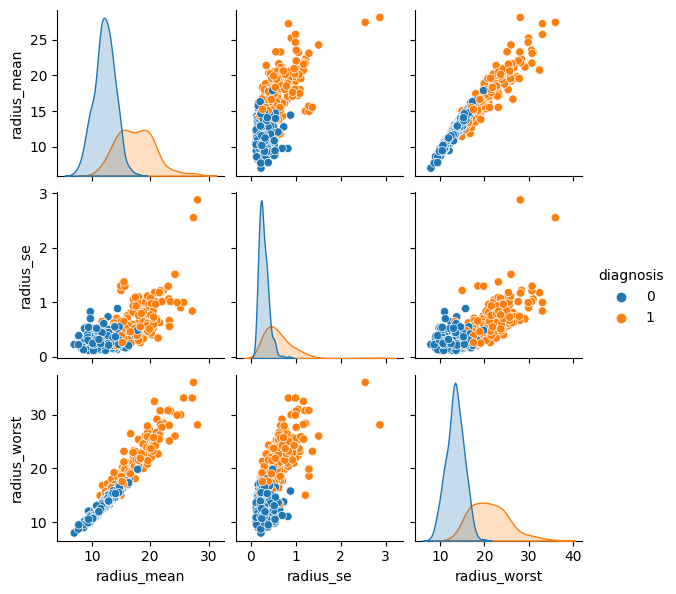

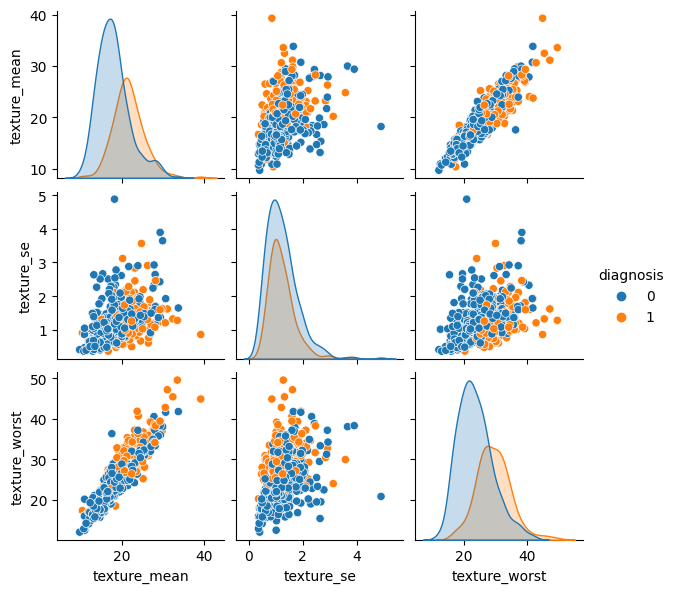

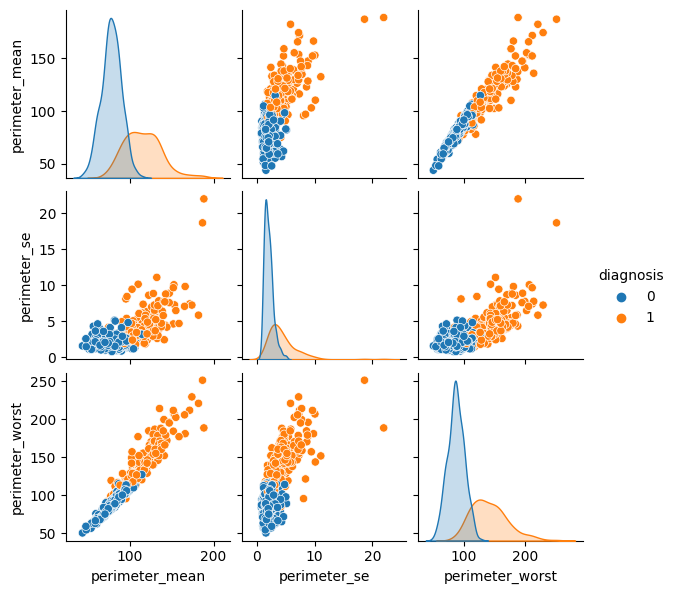

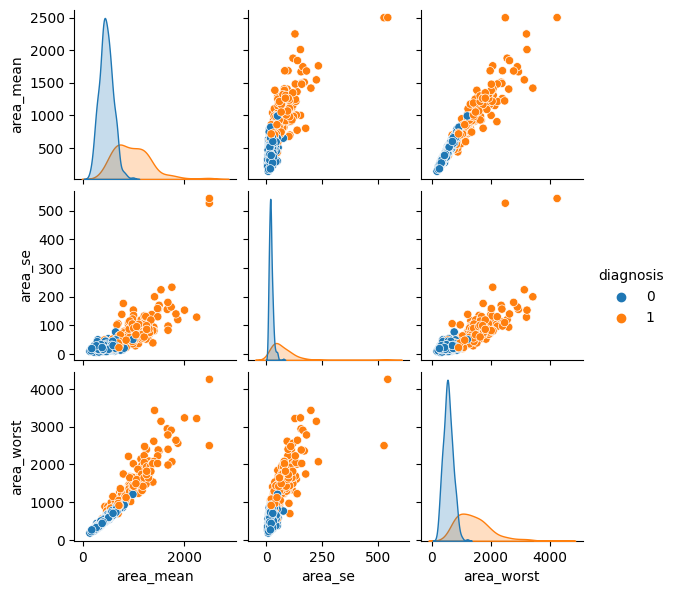

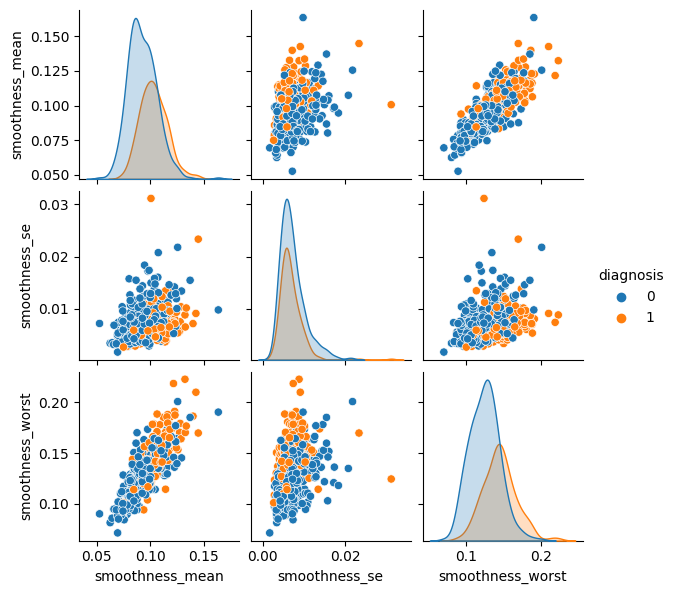

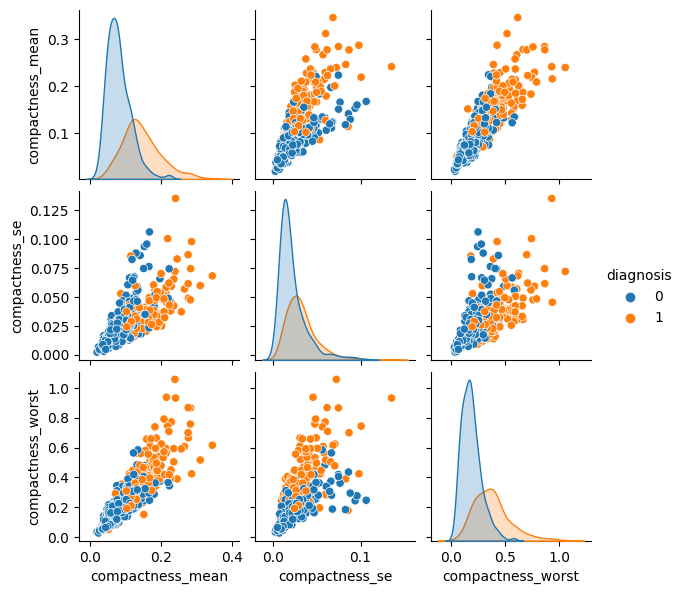

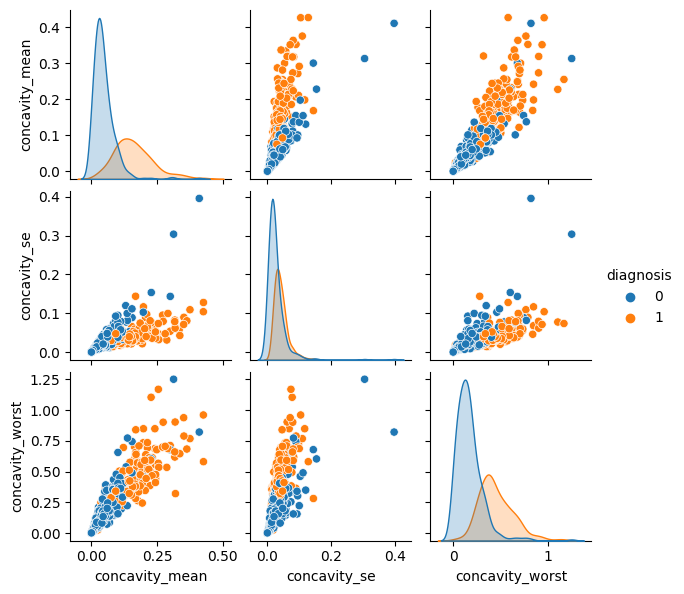

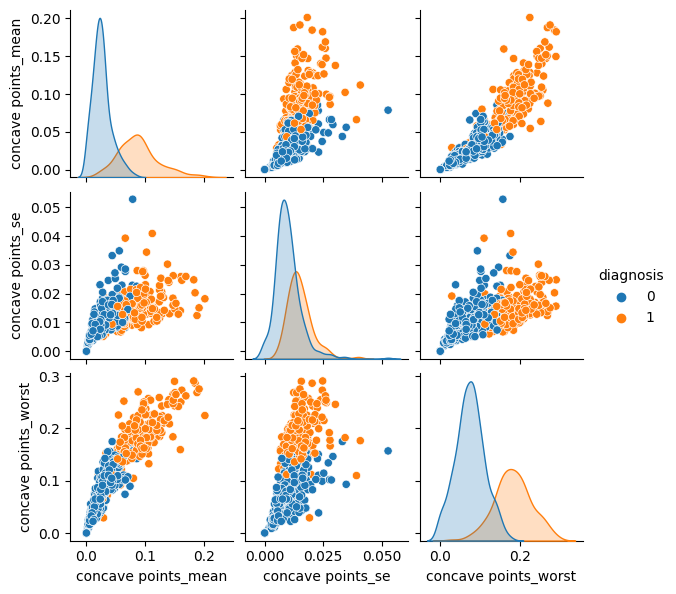

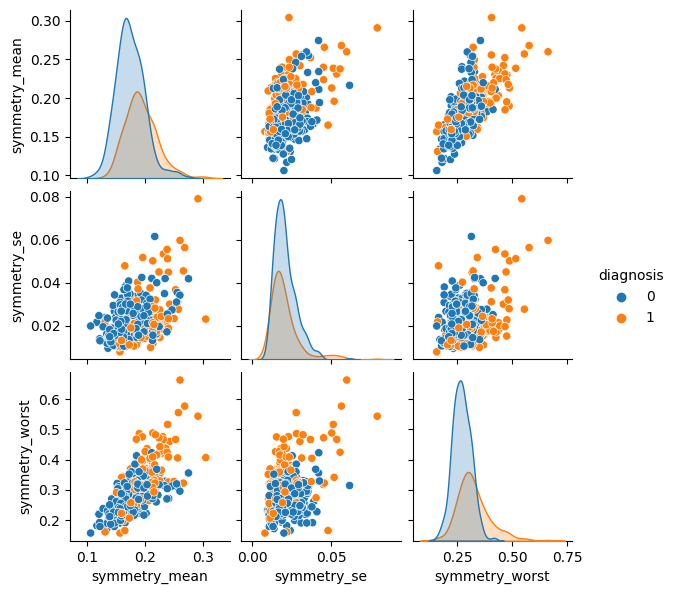

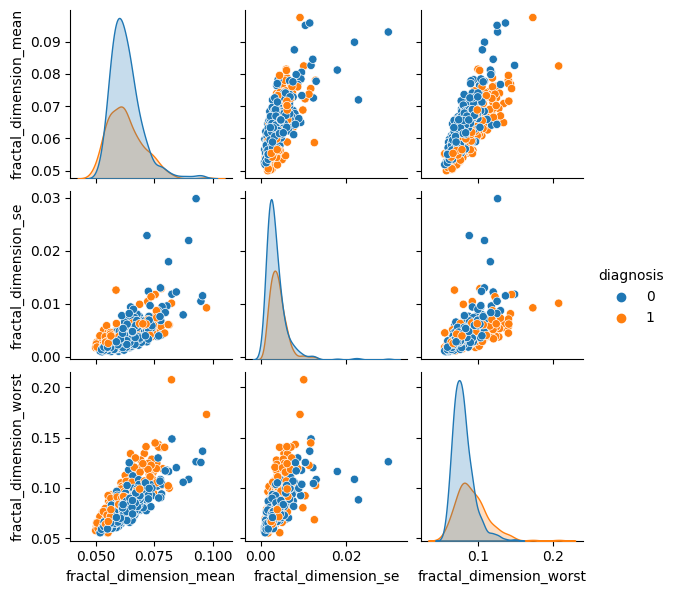

In [22]:
for key in feature_groups.keys():
    sns.pairplot(model_df, vars=feature_groups[key], hue='diagnosis', height=2)

In [23]:
from sklearn.model_selection import train_test_split
X=model_df.drop('diagnosis',axis=1)
y=model_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
knn= KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [25]:
lm1=LogisticRegression()
lm1.fit(X_train,y_train)
print("fit" , lm1.score(X_train, y_train))


fit 0.9436619718309859


c:\Users\HP\anaconda2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
      
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True')
    plt.xlabel('Predicted')

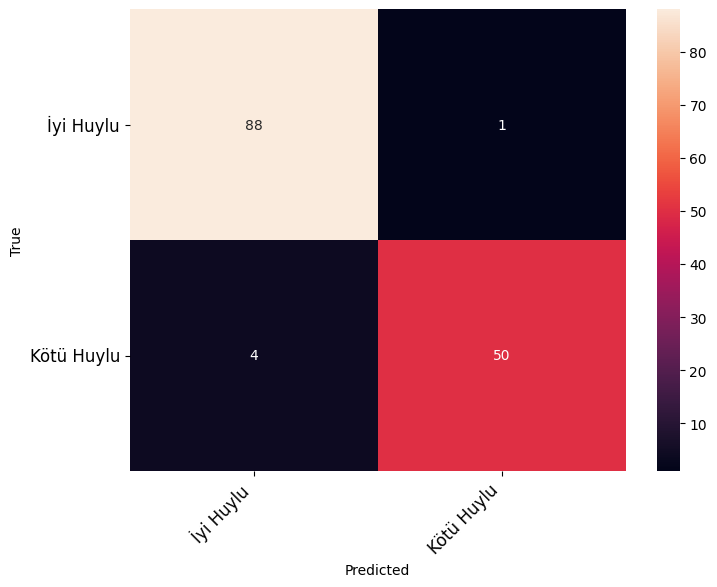

In [27]:
class_names = ['İyi Huylu', 'Kötü Huylu']   
print_confusion_matrix(confusion_matrix(y_test, knn_model.predict(X_test)), class_names, figsize = [8,6], fontsize=12) 

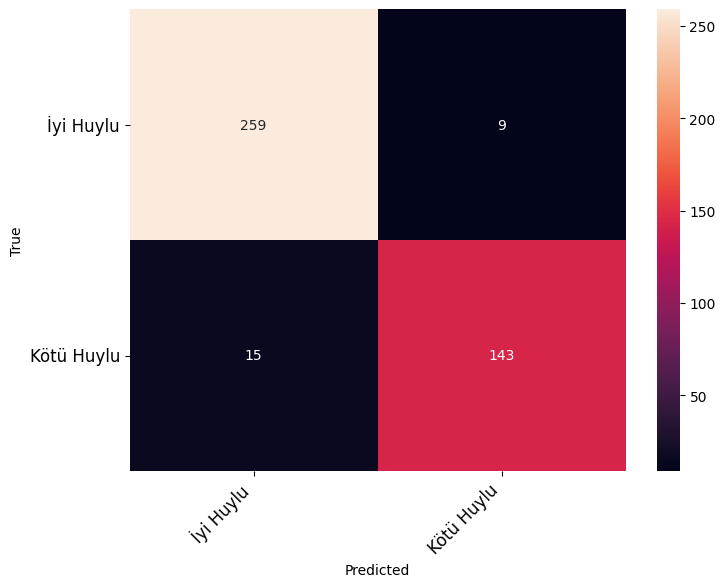

In [28]:
print_confusion_matrix(confusion_matrix(y_train, lm1.predict(X_train)), class_names, figsize = [8,6], fontsize=12)

Xgboost Modeli

In [29]:
seed = 42

In [30]:
X = model_df.drop('diagnosis', axis=1)
y = model_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=seed)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)


train_predictions = xgb_model.predict(dtrain)
train_accuracy = accuracy_score(y_train, train_predictions.round())
print("Eğitim seti doğruluğu:", train_accuracy)


test_predictions = xgb_model.predict(dtest)
test_accuracy = accuracy_score(y_test, test_predictions.round())
print("Test seti doğruluğu:", test_accuracy)


Eğitim seti doğruluğu: 1.0
Test seti doğruluğu: 0.9736842105263158


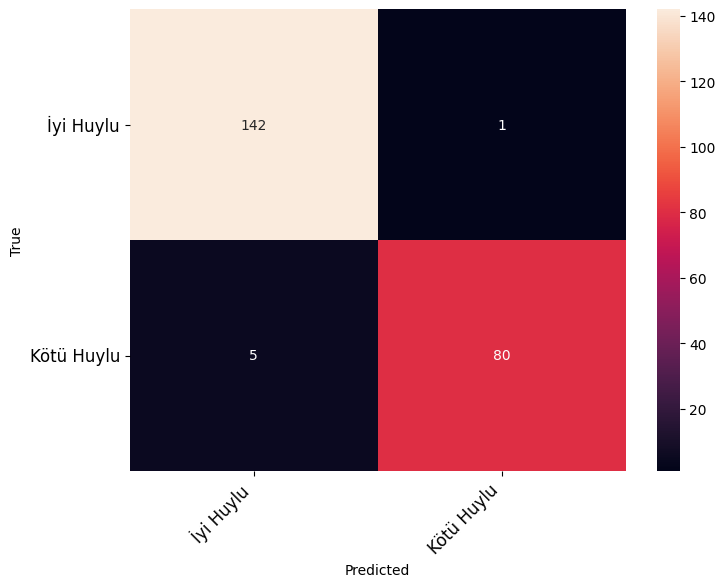

In [31]:
print_confusion_matrix(confusion_matrix(y_test, test_predictions.round()), class_names, figsize = [8,6], fontsize=12)

In [32]:
xgb1 = XGBClassifier(random_state=seed , eval_metric='logloss')
xgb1.fit(X_train, y_train, verbose=True ,eval_set=[(X_test, y_test),(X_train, y_train)])
y_pred = xgb1.predict(X_test)

[0]	validation_0-logloss:0.46291	validation_1-logloss:0.44139
[1]	validation_0-logloss:0.35038	validation_1-logloss:0.32069
[2]	validation_0-logloss:0.28240	validation_1-logloss:0.24263
[3]	validation_0-logloss:0.23617	validation_1-logloss:0.18622
[4]	validation_0-logloss:0.19960	validation_1-logloss:0.14763
[5]	validation_0-logloss:0.17129	validation_1-logloss:0.11961
[6]	validation_0-logloss:0.15051	validation_1-logloss:0.09715
[7]	validation_0-logloss:0.13399	validation_1-logloss:0.08181
[8]	validation_0-logloss:0.12335	validation_1-logloss:0.06883
[9]	validation_0-logloss:0.11104	validation_1-logloss:0.05950
[10]	validation_0-logloss:0.10421	validation_1-logloss:0.05152
[11]	validation_0-logloss:0.10329	validation_1-logloss:0.04473
[12]	validation_0-logloss:0.09636	validation_1-logloss:0.03939
[13]	validation_0-logloss:0.09807	validation_1-logloss:0.03445
[14]	validation_0-logloss:0.09405	validation_1-logloss:0.03166
[15]	validation_0-logloss:0.09090	validation_1-logloss:0.02854
[1

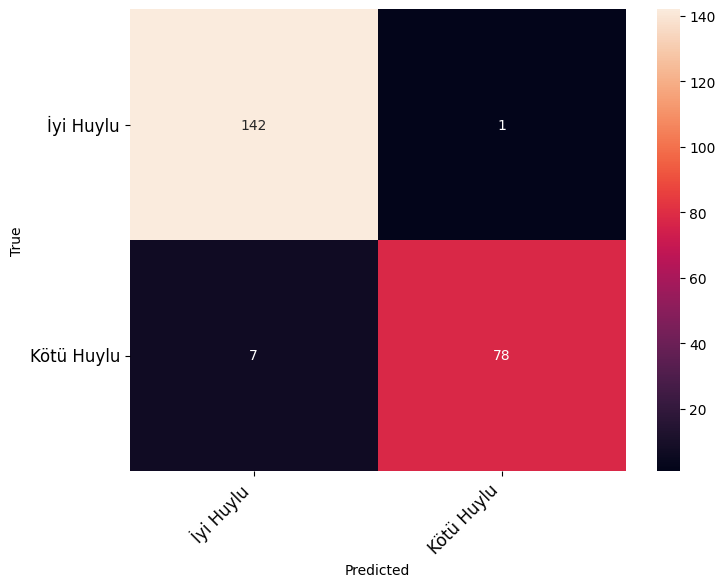

In [33]:
print_confusion_matrix(confusion_matrix(y_test, y_pred), class_names, figsize = [8,6], fontsize=12)

In [34]:
importances = xgb1.get_booster().get_score(importance_type='gain')

fi= pd.DataFrame({'importance': list(importances.values()), 'feature': list(importances.keys())})
fi.sort_values(by='importance', ascending=False, inplace=True)
fi

importance                 feature
20   21.176691         perimeter_worst
6    11.468736     concave points_mean
18    9.169420            radius_worst
24    6.639135    concave points_worst
2     3.260413               area_mean
23    3.068708         concavity_worst
5     3.022532          concavity_mean
1     1.962809            texture_mean
0     1.671223             radius_mean
21    1.240397              area_worst
17    1.115761    fractal_dimension_se
19    0.958733           texture_worst
12    0.880012                 area_se
13    0.698760           smoothness_se
4     0.678397        compactness_mean
3     0.642234         smoothness_mean
22    0.580049        smoothness_worst
10    0.537930              texture_se
11    0.438850            perimeter_se
14    0.432504          compactness_se
9     0.420567               radius_se
25    0.286817          symmetry_worst
16    0.215394             symmetry_se
7     0.169008           symmetry_mean
15    0.157963       concave points_se
8     0.102118  fractal_dimension_mean

<Axes: >

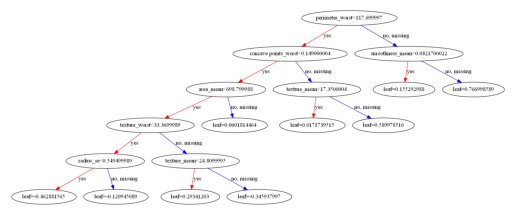

In [35]:
plot_tree(xgb1, num_trees=0)